In [31]:
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [32]:
#!dw configure

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np

import datadotworld as dw

In [33]:
#drive.mount("/content/drive")

In [ ]:
ls

In [ ]:
cd "drive/My Drive/Colab Notebooks/dw_matrix"

In [8]:
!mkdir data

In [9]:
!echo 'data' > .gitignore

In [10]:
!git add .gitignore

In [11]:
data = dw.load_dataset("datafiniti/mens-shoe-prices")

In [13]:
df = data.dataframes['7004_1']
df.shape

(19387, 48)

In [14]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
17023,AVpe9gWeLJeJML43zReD,NaN,Faded Glory,"Men's Boots,Boys' Shoes,Shoes,Baby & Kids Shoe...","Camo,BLACK",NaN,2015-11-30T01:46:56Z,2017-01-09T19:38:40Z,"[{""dateSeen"":[""2017-01-09T19:38:40Z""],""sourceU...",6.0 in x 6.0 in x 1.0 in,6.053882e+11,"[{""key"":""Primary Color"",""value"":[""Green"",""Blac...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-7dee/...,NaN,"fadedglory/byrt4510002,605388190253,fadedglory...",NaN,BYRT4510002,"[{""dateSeen"":[""2017-01-09T19:38:40Z""],""name"":""...",Faded Glory Boys' Camo Pull-on Boot,11.95,11.95,NaN,CAMO,new,NaN,USD,2015-12-03T01:07:44Z,2015-12-01T00:00:00Z,NaN,true,NaN,USD 4.92,NaN,FREE shipping on orders 35 +,1,NaN,http://www.walmart.com/ip/Faded-Glory-Boys-Cam...,NaN,NaN,NaN,"3,2,1,6,5,4,13,12","[{""sourceURLs"":[""http://www.walmart.com/ip/Fad...",http://www.walmart.com/ip/Faded-Glory-Boys-Cam...,605388190253,NaN,NaN,1.0 lbs
16588,AVpfp0vYLJeJML43BO5O,NaN,ERGOMATES,"Home Improvement,Men's Work & Safety Shoes,Wor...",Black,NaN,2016-04-15T15:58:20Z,2016-05-06T14:49:18Z,NaN,NaN,NaN,"[{""key"":""Material"",""value"":[""EVA Foam, Rubber ...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-7eb7/...,NaN,ergomates/g88703b,ERGOMATES,G88703B,"[{""dateSeen"":[""2016-04-15T15:58:20Z""],""name"":""...","Ergomates Size 10 To 13 Antifatigue Soles, Men...",44.68,44.68,NaN,NaN,new,NaN,USD,2016-04-15T15:58:20Z,2016-05-05T00:00:00Z,NaN,false,Zoro - Walmart.com,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/ERGOMATES-G88703B-An...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/ERGOMATES-G88703B-An...,NaN,NaN,NaN,NaN
7458,AVpe9MPD1cnluZ0-arp-,NaN,Nike,"Clothing, Shoes & Accessories,Team Sports,Men,...",Green,NaN,2016-04-10T23:12:48Z,2016-06-20T14:14:33Z,"[{""dateSeen"":[""2016-06-20T14:14:33Z""],""sourceU...",NaN,9.120744e+10,"[{""key"":""Sport"",""value"":[""Soccer""]},{""key"":""Ma...",NaN,http://i.ebayimg.com/images/g/l2EAAOSw14xWLXtA...,NaN,"091207441468,0091207441468,niketiempolegendvfg...",NaN,NaN,"[{""dateSeen"":[""2016-06-18T00:00:00Z""],""name"":""...",Nike Tiempo Legend V Fg Green Strike Soccer Cl...,51.01,51.01,NaN,NaN,New with box,NaN,USD,2016-04-10T23:12:48Z,2016-03-31T00:00:00Z,NaN,false,NaN,winning bid,NaN,USD 12.99,NaN,NaN,http://www.ebay.com/itm/New-Nike-Legend-V-FG-U...,NaN,NaN,NaN,8,"[{""sourceURLs"":[""http://www.ebay.com/itm/Nike-...",http://www.ebay.com/itm/Nike-Tiempo-Legend-V-F...,091207441468,NaN,NaN,NaN
19128,AVpfziyELJeJML43ED42,NaN,Ralph Lauren,"Casual,Men,Shoes","Black,Green,Turquoise,Snuff,Navy,Signal Orange...",NaN,2015-08-18T16:43:54Z,2016-02-25T20:49:59Z,NaN,NaN,NaN,NaN,NaN,http://www.ralphlauren.com/graphics/product_im...,NaN,"haroldsuedetasseldriver/20800768,ralphlauren/1...",NaN,16151556,"[{""address"":""650 Madison Ave C1"",""availability...",Harold Suede Tassel Driver,425.00,425.00,NaN,Snuff,New,NaN,USD,2015-08-18T16:43:54Z,2015-08-11T00:00:00Z,NaN,false,www.ralphlauren.com,NaN,The full amount will be credited to the origin...,FREE SHIPPING ON ORDERS OVER $125. $5 FLAT-RAT...,9.5 E,NaN,http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ralphlauren.com/pr...",http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,NaN
769,AVpe-ffCLJeJML43zoRk,NaN,Quiksilver,"All Men's Shoes,Shoes,Men's Shoes,Clothing",Black,NaN,2017-01-12T06:17:12Z,2017-01-12T06:17:12Z,"[{""dateSeen"":[""2017-01-12T06:17:12Z""],""sourceU...",NaN,8.882568e+11,"[{""key"":""Heel Height"",""value"":[""Flat (0 to 1/2...",NaN,htt

In [15]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [16]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [17]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
New with box                                              3
PalmBeach Jewelry - Walmart.com                           3
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
New without tags                                          1
Name: prices_currency, dtype: int64

In [19]:
df_usd = df[ df.prices_currency == 'USD' ].copy()
df_usd.shape

(18524, 48)

In [20]:
df_usd.prices_amountmin.head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: object

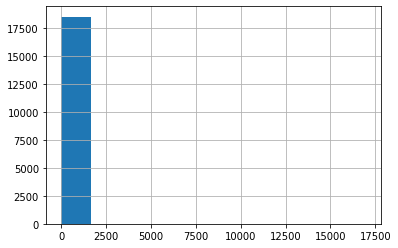

In [21]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [24]:
filter_max = np.percentile( df_usd['prices_amountmin'], 99 )
filter_max

895.0

In [25]:
df_usd_filter = df_usd[ df_usd['prices_amountmin'] < filter_max ]

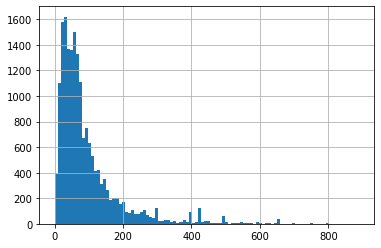

In [27]:
df_usd_filter.prices_amountmin.hist(bins=100)

In [ ]:
ls matrix_one